# Surprise Housing - Advanced Regression

**Instructions to run the code**
    
    1. Do not alter any file name.
    2. Keep the folder structure intact.
    3. Keep all the files in folder where python notebook is located.
    4. Few verification steps are purposely added. Uncomment them and execute as and when required.

**Folder Structure**  <br>
```Surprise Housing - Advanced Regression``` #Main Folder
>```train.csv``` #Data file<br>

<font color=blue> **Read Data**	<br>
* Import important libraries	<br>
* Read housing data into dataframe	<br>
* Quick review of dataframe	<br>
	
**Data Preparation**	<br>
* Check missing values in dataframe	<br>
* Drop columns withh more than 80% missing values	<br>
* Impute LotFrontage	<br>
* Impute FireplaceQu	<br>
* Impute Garage related fields	<br>
* Impute Basement related fields	<br>
* Impute missing categorical variables with mode	<br>
* Impute missing quantitative variables with median	<br>
	
**Feature Engineering**	<br>
* Calculate age of house when sold	<br>
	
**Data Analysis**	<br>
* Check distribution of target variable	<br>
* Transform targert variable (log transformation)	<br>
* Create list of numeric and non-numeric columns	<br>
* Analyze outliers from quantitative variables	<br>
* Remove outliers from numerical data	<br>
* Bar plots of quantitative variables vs SalePrice	<br>
* Analyze impact of categorical values on price of house	<br>
* Checking correlation of quantitative variables in housing	<br>
* Pairplots for numerical variables to understand linear relationship	<br>
	
**Data Preparation for Modeling**	<br>
* Dummy variable encoding (one-hot) for other categorical variables	<br>
* Splitting the Data into Training and Testing Sets	<br>
* Create X and y sets	<br>
* Scaling the variables using StandardScaler (Normalizing)	<br>
	
**Ridge Regression**	<br>
* Tune hyperparameter using GridSearchCV	<br>
* Plotting scores to determine optimal alpha	<br>
* Build Ridge regression using best alpha	<br>
* Prediction using ridge regression	<br>
	
**Lasso Regression**	<br>
* Tune hyperparameter using GridSearchCV	<br>
* Plotting scores to determine optimal alpha	<br>
* Build Lasso regression model using best alpha	<br>
* Prediction using lasso regression	<br>
	
**Model Conclusion**	<br>
	
**Subjective Questions**	<br>
* Q1 - Setup to understand behaviour of model if alpha is changed	<br>
* Q3 - New model by removing top 5 predictor variables	<br>

### Import import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Librares for Data Modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics

### Read Data

#### Read housing data into dataframe

In [2]:
# Read housing data into dataframe
housing = pd.read_csv(r"./train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Quick review of dataframe

In [3]:
# Check shape of dataframe
housing.shape

(1460, 81)

In [4]:
# Describe dataframe
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
# Review dataframe columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Preparation

#### Check missing values in dataframe

In [6]:
# Check for missing values
round(100*(housing.loc[:,housing.isnull().any()].isnull().sum()/len(housing.index)),2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

#### Drop columns withh more than 80% missing values

In [7]:
# Delete columns with more than 80% missing values
cols2drop = ["Alley", "PoolQC", "Fence", "MiscFeature"]
housing.drop(cols2drop,axis=1,inplace=True)

# Quick review of dataframe shape
housing.shape

(1460, 77)

#### Impute LotFrontage

In [8]:
# Check stats for "LotFrontage"
housing["LotFrontage"].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [9]:
# Impute value with median for LotFrontage
housing.loc[np.isnan(housing["LotFrontage"]),"LotFrontage"] = housing["LotFrontage"].median()

#### Impute FireplaceQu

In [10]:
# Check stats for "FireplaceQu"
housing["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### If there are no fireplace then fireplace quanlity can be imputed as (NA	== No Fireplace)
If Fireplaces == 0 <br>
then FireplaceQu == "NA"

In [11]:
# Checking if house with no fireplaces has been assigned any quality
housing.loc[housing["Fireplaces"]==0]["FireplaceQu"].value_counts()

Series([], Name: FireplaceQu, dtype: int64)

In [12]:
# Assign "NA" as fireplace quality to houses with no fireplace
housing.loc[housing["Fireplaces"]==0,"FireplaceQu"] = "NA"
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [13]:
# Check missing values again
round(100*(housing.loc[:,housing.isnull().any()].isnull().sum()/len(housing.index)),2)

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

#### Impute Garage related fields

In [14]:
# Review Garage related fields
housing.loc[pd.isnull(housing["GarageType"]),["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","GarageCars"]]

GarageType  GarageYrBlt GarageFinish GarageQual GarageCond  GarageCars
39          NaN          NaN          NaN        NaN        NaN           0
48          NaN          NaN          NaN        NaN        NaN           0
78          NaN          NaN          NaN        NaN        NaN           0
88          NaN          NaN          NaN        NaN        NaN           0
89          NaN          NaN          NaN        NaN        NaN           0
99          NaN          NaN          NaN        NaN        NaN           0
108         NaN          NaN          NaN        NaN        NaN           0
125         NaN          NaN          NaN        NaN        NaN           0
127         NaN          NaN          NaN        NaN        NaN           0
140         NaN          NaN          NaN        NaN        NaN           0
148         NaN          NaN          NaN        NaN        NaN           0
155         NaN          NaN          NaN        NaN        NaN           0
163         NaN          NaN          NaN        NaN        NaN           0
165         NaN          NaN          NaN        NaN        NaN           0
198         NaN          NaN          NaN        NaN        NaN           0
210         NaN          NaN          NaN        NaN        NaN           0
241         NaN          NaN          NaN        NaN        NaN           0
250         NaN          NaN          NaN        NaN        NaN           0
287         NaN          NaN          NaN        NaN        NaN           0
291         NaN          NaN          NaN        NaN        NaN           0
307         NaN          NaN          NaN        NaN        NaN           0
375         NaN          NaN          NaN        NaN        NaN           0
386         NaN          NaN          NaN        NaN        NaN           0
393         NaN          NaN          NaN        NaN        NaN           0
431         NaN          NaN          NaN        NaN        NaN           0
434         NaN          NaN          NaN        NaN        NaN           0
441         NaN          NaN          NaN        NaN        NaN           0
464         NaN          NaN          NaN        NaN        NaN           0
495         NaN          NaN          NaN        NaN        NaN           0
520         NaN          NaN          NaN        NaN        NaN           0
...         ...          ...          ...        ...        ...         ...
954         NaN          NaN          NaN        NaN        NaN           0
960         NaN          NaN          NaN        NaN        NaN           0
968         NaN          NaN          NaN        NaN        NaN           0
970         NaN          NaN          NaN        NaN        NaN           0
976         NaN          NaN          NaN        NaN        NaN           0
1009        NaN          NaN          NaN        NaN        NaN           0
1011        NaN          NaN          NaN        NaN        NaN           0
1030        NaN          NaN          NaN        NaN        NaN           0
1038        NaN          NaN          NaN        NaN        NaN           0
1096        NaN          NaN          NaN        NaN        NaN           0
1123        NaN          NaN          NaN        NaN        NaN           0
1131        NaN          NaN          NaN        NaN        NaN           0
1137        NaN          NaN          NaN        NaN        NaN           0
1143        NaN          NaN          NaN        NaN        NaN           0
1173        NaN          NaN          NaN        NaN        NaN           0
1179        NaN          NaN          NaN        NaN        NaN           0
1218        NaN          NaN          NaN        NaN        NaN           0
1219        NaN          NaN          NaN        NaN        NaN           0
1234        NaN          NaN          NaN        NaN        NaN           0
1257        NaN          NaN          NaN        NaN        NaN           0
1283        NaN          NaN          NaN        NaN 

#### If there are no garage then garage related fields can be imputed as (NA	== No Garage)
If GarageCars == 0 <br>
then Garage related fields == "NA"

In [15]:
# Assign "NA" to garage related fields where there are no garage
housing.loc[housing["GarageCars"]==0,["GarageType","GarageFinish","GarageQual","GarageCond"]] = "NA"
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [16]:
# Assign "defalt year" to garage related fields where there is no garage
housing.loc[housing["GarageCars"]==0,"GarageYrBlt"] = 0
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [17]:
# Check missing values again
round(100*(housing.loc[:,housing.isnull().any()].isnull().sum()/len(housing.index)),2)

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
dtype: float64

#### Impute Basement related fields

In [18]:
# Review Basement related fields
housing.loc[pd.isnull(housing["BsmtQual"]),["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","TotalBsmtSF"]]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF
17        NaN      NaN          NaN          NaN          NaN            0
39        NaN      NaN          NaN          NaN          NaN            0
90        NaN      NaN          NaN          NaN          NaN            0
102       NaN      NaN          NaN          NaN          NaN            0
156       NaN      NaN          NaN          NaN          NaN            0
182       NaN      NaN          NaN          NaN          NaN            0
259       NaN      NaN          NaN          NaN          NaN            0
342       NaN      NaN          NaN          NaN          NaN            0
362       NaN      NaN          NaN          NaN          NaN            0
371       NaN      NaN          NaN          NaN          NaN            0
392       NaN      NaN          NaN          NaN          NaN            0
520       NaN      NaN          NaN          NaN          NaN            0
532       NaN      NaN          NaN          NaN          NaN            0
533       NaN      NaN          NaN          NaN          NaN            0
553       NaN      NaN          NaN          NaN          NaN            0
646       NaN      NaN          NaN          NaN          NaN            0
705       NaN      NaN          NaN          NaN          NaN            0
736       NaN      NaN          NaN          NaN          NaN            0
749       NaN      NaN          NaN          NaN          NaN            0
778       NaN      NaN          NaN          NaN          NaN            0
868       NaN      NaN          NaN          NaN          NaN            0
894       NaN      NaN          NaN          NaN          NaN            0
897       NaN      NaN          NaN          NaN          NaN            0
984       NaN      NaN          NaN          NaN          NaN            0
1000      NaN      NaN          NaN          NaN          NaN            0
1011      NaN      NaN          NaN          NaN          NaN            0
1035      NaN      NaN          NaN          NaN          NaN            0
1045      NaN      NaN          NaN          NaN          NaN            0
1048      NaN      NaN          NaN          NaN          NaN            0
1049      NaN      NaN          NaN          NaN          NaN            0
1090      NaN      NaN          NaN          NaN          NaN            0
1179      NaN      NaN          NaN          NaN          NaN            0
1216      NaN      NaN          NaN          NaN          NaN            0
1218      NaN      NaN          NaN          NaN          NaN            0
1232      NaN      NaN          NaN          NaN          NaN            0
1321      NaN      NaN          NaN          NaN          NaN            0
1412      NaN      NaN          NaN          NaN          NaN            0

#### If there are no basement then basement related fields can be imputed as (NA	== No Basement)
If TotalBsmtSF == 0 <br>
then Basement related fields == "NA"

In [19]:
# Assign "NA" to basement related fields where there are no basement
housing.loc[housing["TotalBsmtSF"]==0,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]] = "NA"
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [20]:
# Check missing values again
round(100*(housing.loc[:,housing.isnull().any()].isnull().sum()/len(housing.index)),2)

MasVnrType      0.55
MasVnrArea      0.55
BsmtExposure    0.07
BsmtFinType2    0.07
Electrical      0.07
dtype: float64

#### Impute missing categorical variables with mode

In [21]:
# Impute MasVnrType
housing.loc[pd.isnull(housing["MasVnrType"]),"MasVnrType"] = housing["MasVnrType"].mode().values

# Impute BsmtExposure
housing.loc[pd.isnull(housing["BsmtExposure"]),"BsmtExposure"] = housing["BsmtExposure"].mode().values

# Impute BsmtFinType2
housing.loc[pd.isnull(housing["BsmtFinType2"]),"BsmtFinType2"] = housing["BsmtFinType2"].mode().values

# Impute Electrical
housing.loc[pd.isnull(housing["Electrical"]),"Electrical"] = housing["Electrical"].mode().values

#### Impute missing quantitative variables with median

In [22]:
# Impute MasVnrArea
housing.loc[np.isnan(housing["MasVnrArea"]),"MasVnrArea"] = housing["MasVnrArea"].median()

In [23]:
housing["MasVnrType"].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [24]:
# Check missing values again
round(100*(housing.loc[:,housing.isnull().any()].isnull().sum()/len(housing.index)),2)

Series([], dtype: float64)

In [25]:
# Create mapping for Condition categorical variables
cond_mapping = {"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}

condcols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',  'GarageQual','GarageCond']

for col in condcols:
    housing[col] = housing[col].map(cond_mapping)

In [26]:
# Create mapping for 'BsmtExposure'
cond_mapping = {"NA":0, "No":1, "Mn":2, "Av":3, "Gd":4}

housing['BsmtExposure'] = housing['BsmtExposure'].map(cond_mapping)

In [27]:
# Create mapping for Basement Finish  Type
cond_mapping = {"NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}

condcols = [ 'BsmtFinType1','BsmtFinType2']

for col in condcols:
    housing[col] = housing[col].map(cond_mapping)

In [28]:
# housing[housing["ExterQual"].isnull()]["ExterQual"]

### Feature Engineering

#### Calculate age of house when sold

In [29]:
# Creating a new columns AgeWhenSold = YrSold - YearBuilt
housing["AgeWhenSold"] = housing.apply(lambda df:df["YrSold"]-df["YearBuilt"],axis=1)
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea MiscVal MoSold  \
0    AllPub    Inside  ...         0           0        0       0      2   
1    AllPub       FR2  ...         0           0        0       0      5   
2    AllPub    Inside  ...         0           0        0       0      9   
3    AllPub    Corner  ...         0           0        0       0      2   
4    AllPub       FR2  ...         0           0        0       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  AgeWhenSold  
0   2008        WD         Normal     208500            5  
1   2007        WD         Normal     181500           31  
2   2008        WD         Normal     223500            7  
3   2006        WD        Abnorml     140000           91  
4   2008        WD         Normal     250000            8  

[5 rows x 78 columns]

In [30]:
# Drop "YrSold" and "YearBuilt" columns
cols2drop = ["YrSold","YearBuilt"]
housing.drop(cols2drop,axis=1,inplace=True)

### Data Analysis

#### Check distribution of target variable

<AxesSubplot:xlabel='SalePrice'>

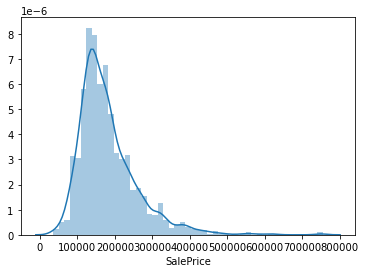

In [31]:
# Distribution of target variable SalesPrice
Y = housing["SalePrice"]
sns.distplot(Y)

#### Transform targert variable (log transformation)

<AxesSubplot:xlabel='SalePrice'>

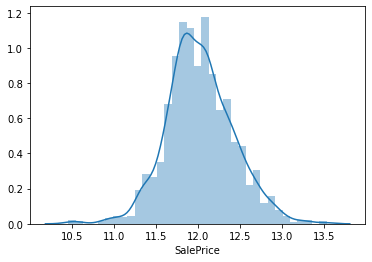

In [32]:
# Distribution of target variable log(SalesPrice)
sns.distplot(np.log(Y))

In [33]:
# Transfor targetvariable - log transformation
housing["SalePrice"] = housing["SalePrice"].apply(lambda c:np.log(c))

#### Create list of numeric and non-numeric columns which will be used later for analysis

In [34]:
numcols = list(housing.select_dtypes(exclude="object").columns)
non_numcols = list(housing.select_dtypes(include="object").columns)

#### Analyze outliers from quantitative variables

In [35]:
# Remove "ID" from numerical columns list for analysis purpose
num2anz = numcols.copy()
num2anz.remove("Id")

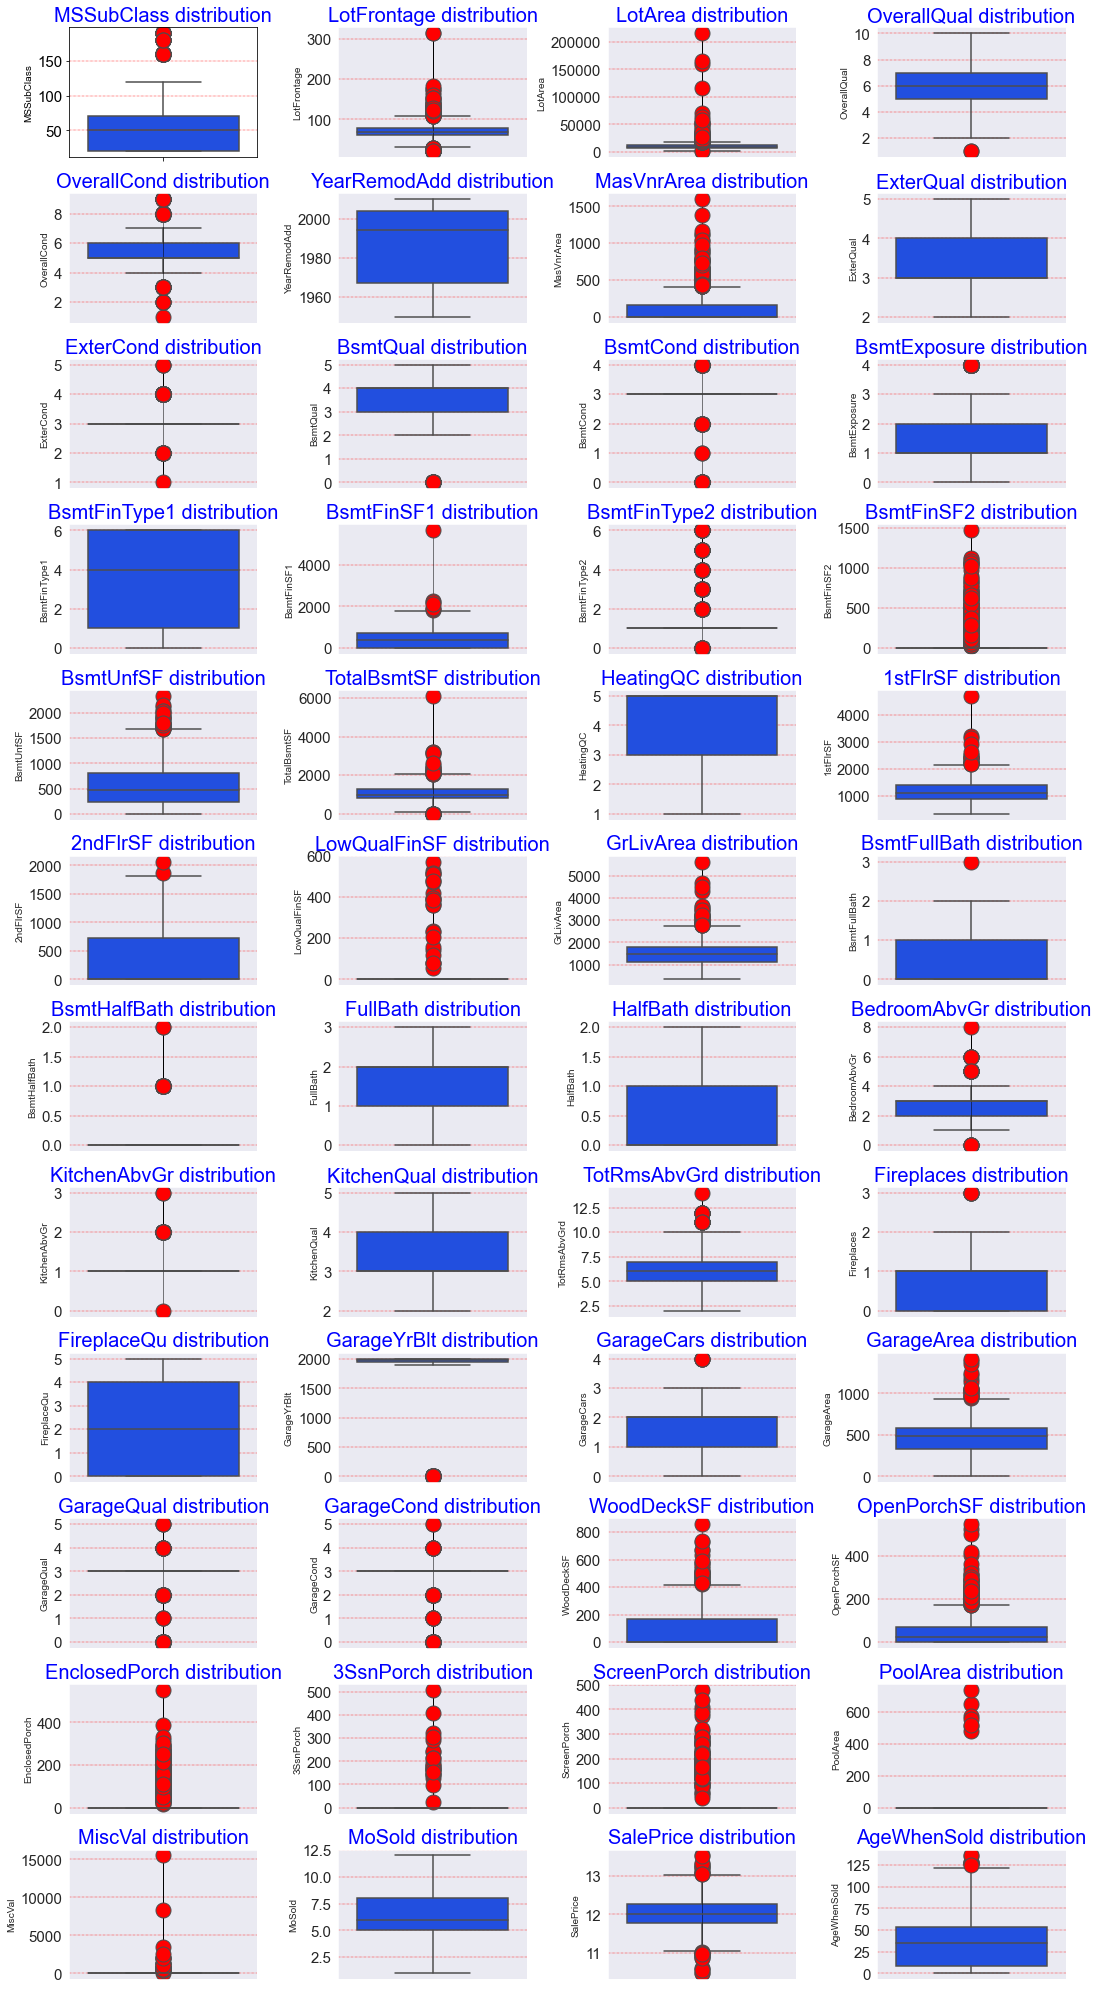

In [36]:
# Plot barplots
ln=len(num2anz)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(2,figsize=(15,30))

for cat in num2anz:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    flierprops = dict(marker='o',markerfacecolor='red', markersize=15,linewidth=0.5,
                linestyle='-')
    
    sns.boxplot(y=housing[cat],palette="bright",flierprops=flierprops)
    title = cat + " distribution"
    plt.title(title,color="b",fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Remove outliers from numerical data

In [37]:
# Remove outlier from LotArea and GarageArea
# Removing all outliers is resulting in significant loss of data
outlier_list = ["LotArea",  "GarageArea"]

print("Shape before removing outlier: ", housing.shape)

## Remove Outliers from housing data
np.warnings.filterwarnings('ignore')

# Calculate Inter Quantile Region (75th Percentile - 25th Percentile)
# Upper cutoff = 75th percentile + 1.5 * (IQR)
# Lower cutoff = 25th percentile - 1.5 * (IQR)

def removeoutlier(housing,col):

    col_q1,col_q3,_col_IQR,lower_cutoff,upper_cutoff = 0,0,0,0,0
    data=pd.DataFrame()
    outlier_data=pd.DataFrame()
    data=housing[col]

    col_q1 = data.quantile(q=.25)
    col_q3 = data.quantile(q=.75)
    col_IQR = col_q3 - col_q1
    lower_cutoff = col_q1 - (1.5 * col_IQR)
    upper_cutoff = col_q3 + (1.5 * col_IQR)

    mask1 = (housing[col] > lower_cutoff) & (housing[col] < upper_cutoff)
    mask2 = (housing[col].isnull()==True)
    if(lower_cutoff==0) | (upper_cutoff==0) | (lower_cutoff == upper_cutoff):
        return housing
        pass
    else:
        housing = housing[mask1 | mask2]
        return housing

## Running in loop to remove all outliers
for column in outlier_list:
    housing = removeoutlier(housing,column)

np.warnings.filterwarnings('default')

print("Shape after removing outlier: ", housing.shape)

Shape before removing outlier:  (1460, 76)
Shape after removing outlier:  (1379, 76)


#### Bar plots of quantitative variables vs SalePrice        

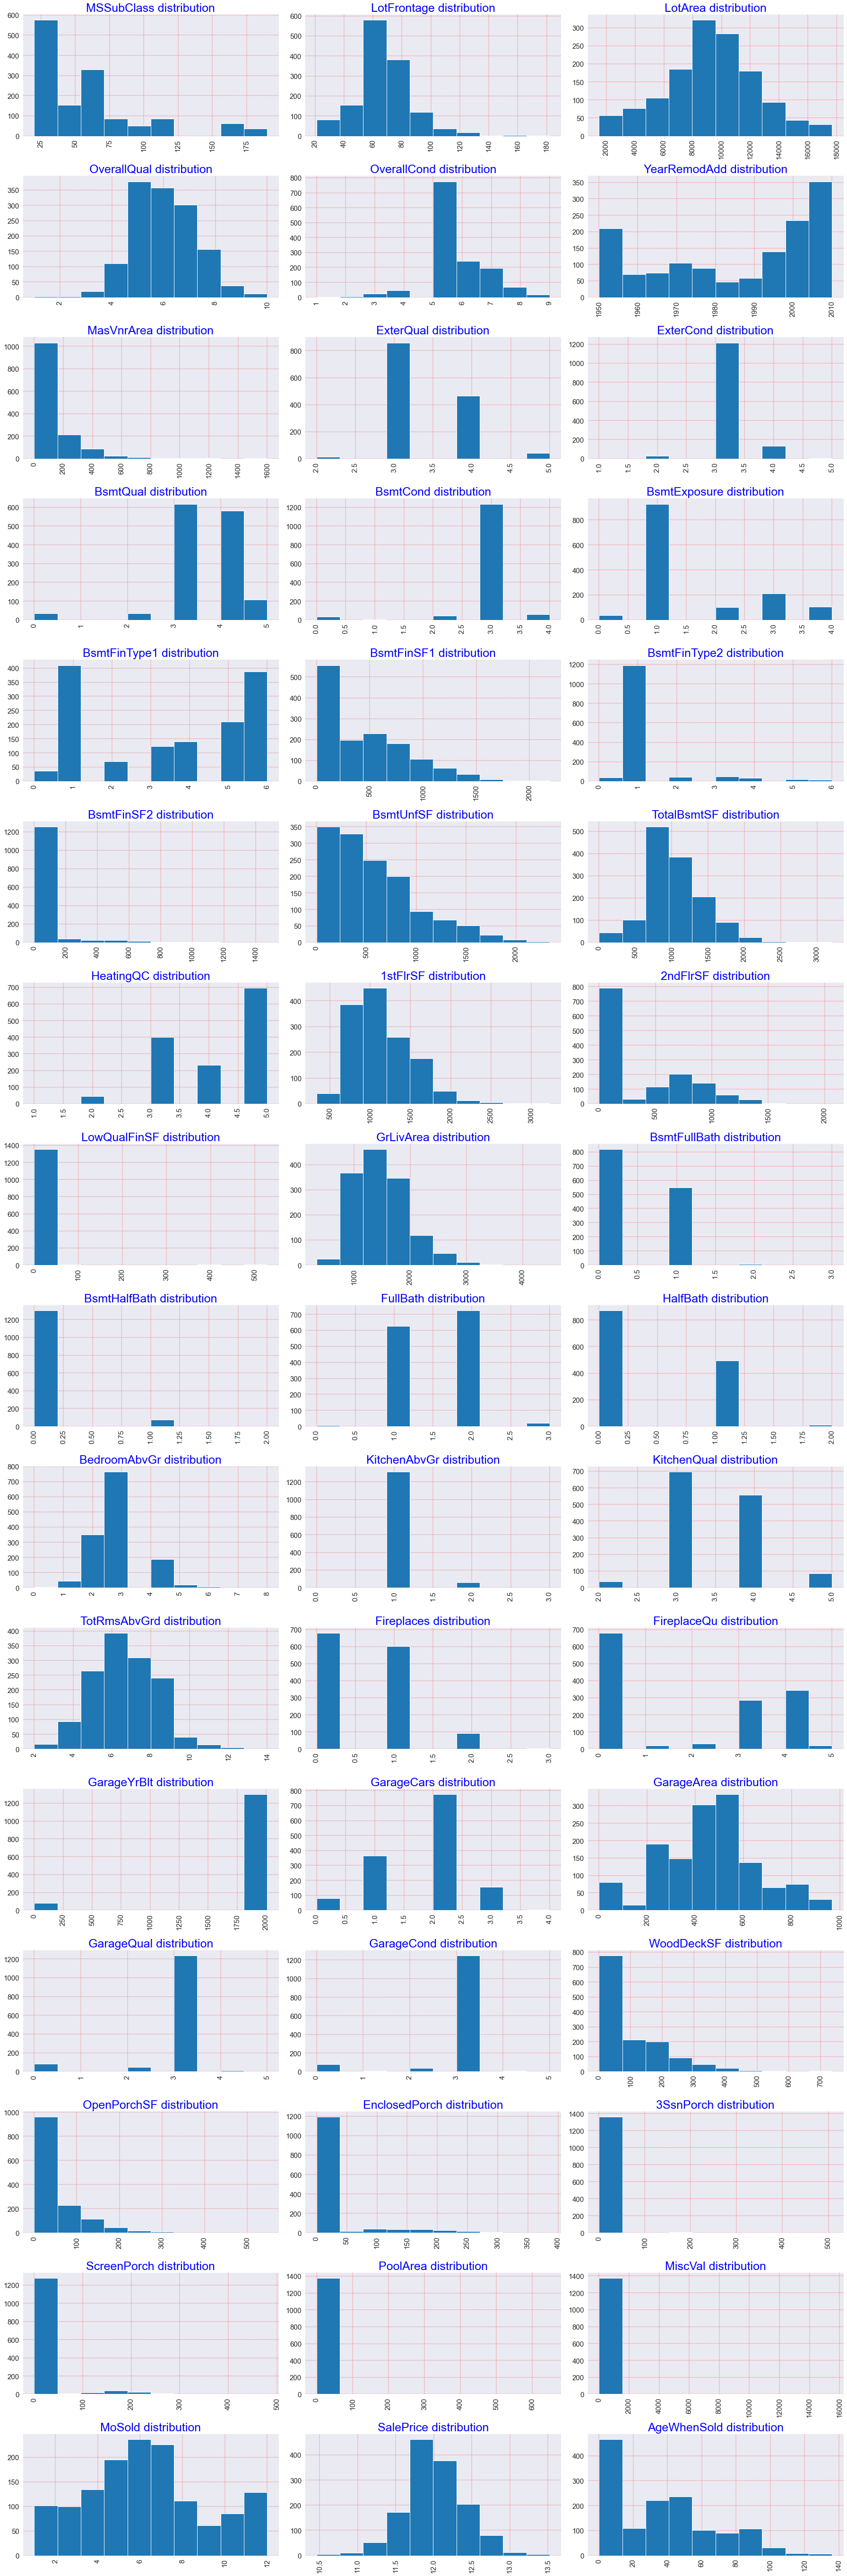

In [38]:
# Plot barplots
ln=len(num2anz)

# calculation for subplots
n=3
m=(ln//n)+1
ct=1

# Sort dataframe by price    
housing_byprice = housing.sort_values(by="SalePrice")

# Setting figure size
plt.figure(2,figsize=(25,80))

for cat in num2anz:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    x=housing_byprice[cat]

    plt.hist(x)
    title = cat + " distribution"
    plt.title(title,color="b",fontsize=25)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Analyze impact of categorical values on price of house

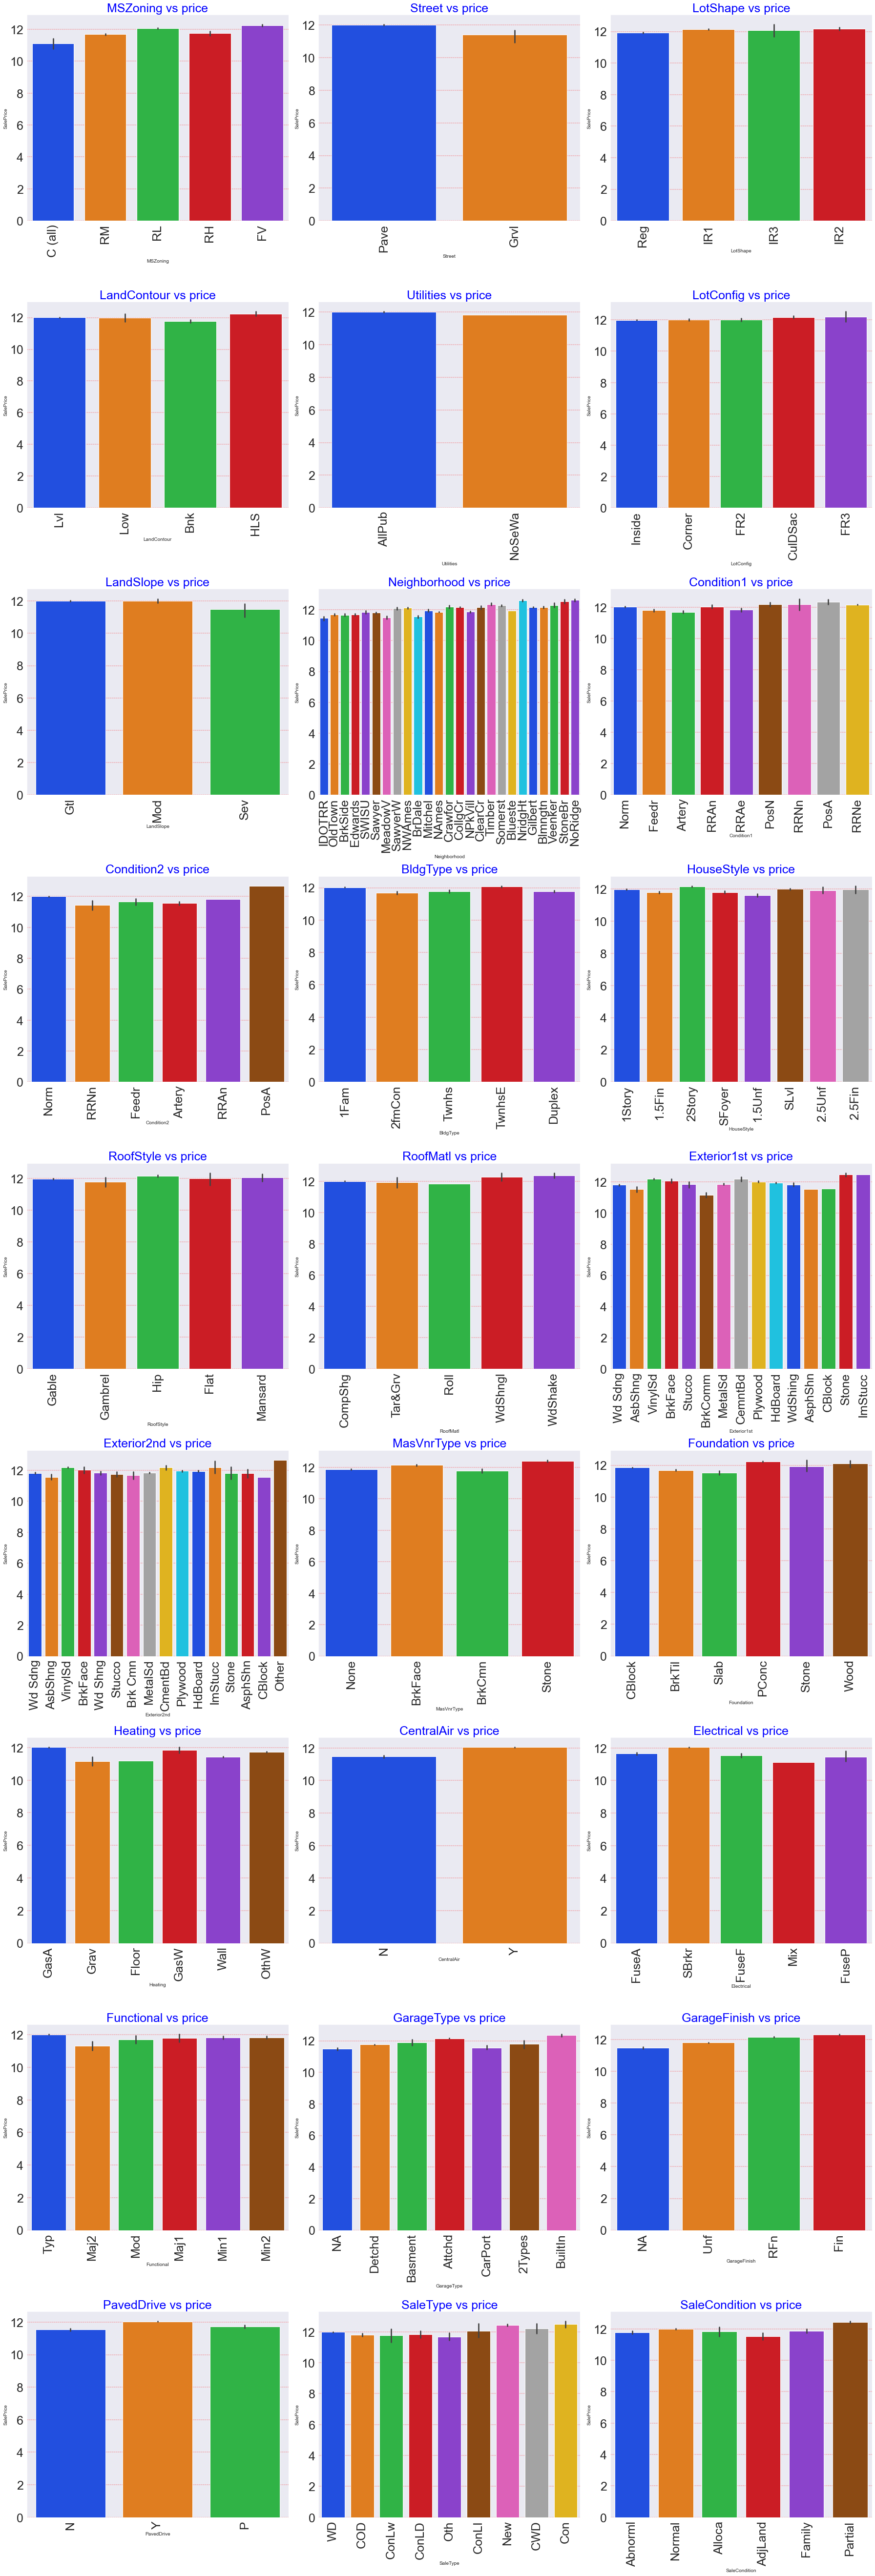

In [39]:
# Categorical cols to analyze
nonnum2anz = non_numcols

# Plot barplots
ln=len(nonnum2anz)

# calculation for subplots
n=3
m=(ln//n)+1
ct=1

# Sort dataframe by price    
housing_byprice = housing.sort_values(by="SalePrice")

# Setting figure size
plt.figure(2,figsize=(25,80))

for cat in nonnum2anz:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)

    sns.barplot(x=cat,y="SalePrice",data=housing_byprice,palette="bright")
    title = cat + " vs price"
    plt.title(title,color="b",fontsize=25)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Checking correlation of quantitative variables in housing

C:\Users\rush2\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


Text(0.5, 1.0, 'Pearson Correlation of Features')

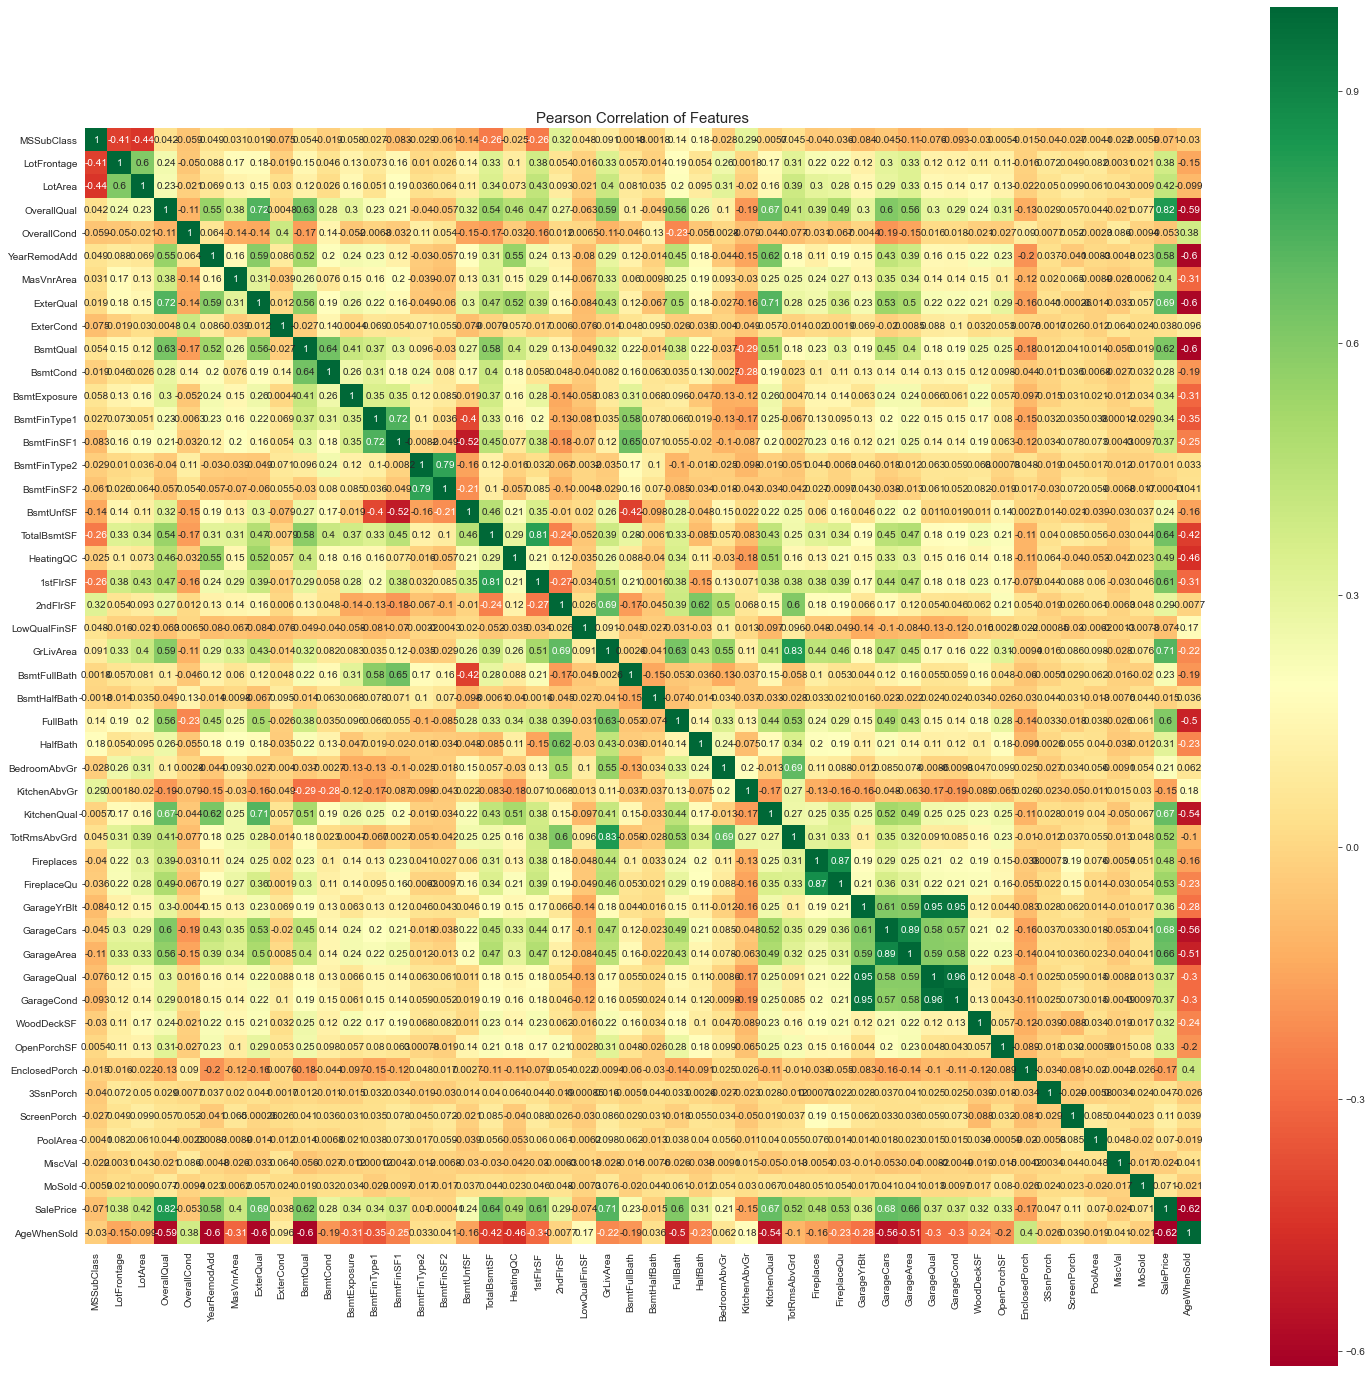

In [40]:
plt.figure(4,figsize=(25,25))
corr1 = housing[num2anz].corr()
sns.heatmap(corr1,annot=True,cmap="RdYlGn",square=True)
plt.title('Pearson Correlation of Features', size=15)

#### Pairplots for numerical variables to understand linear relationship

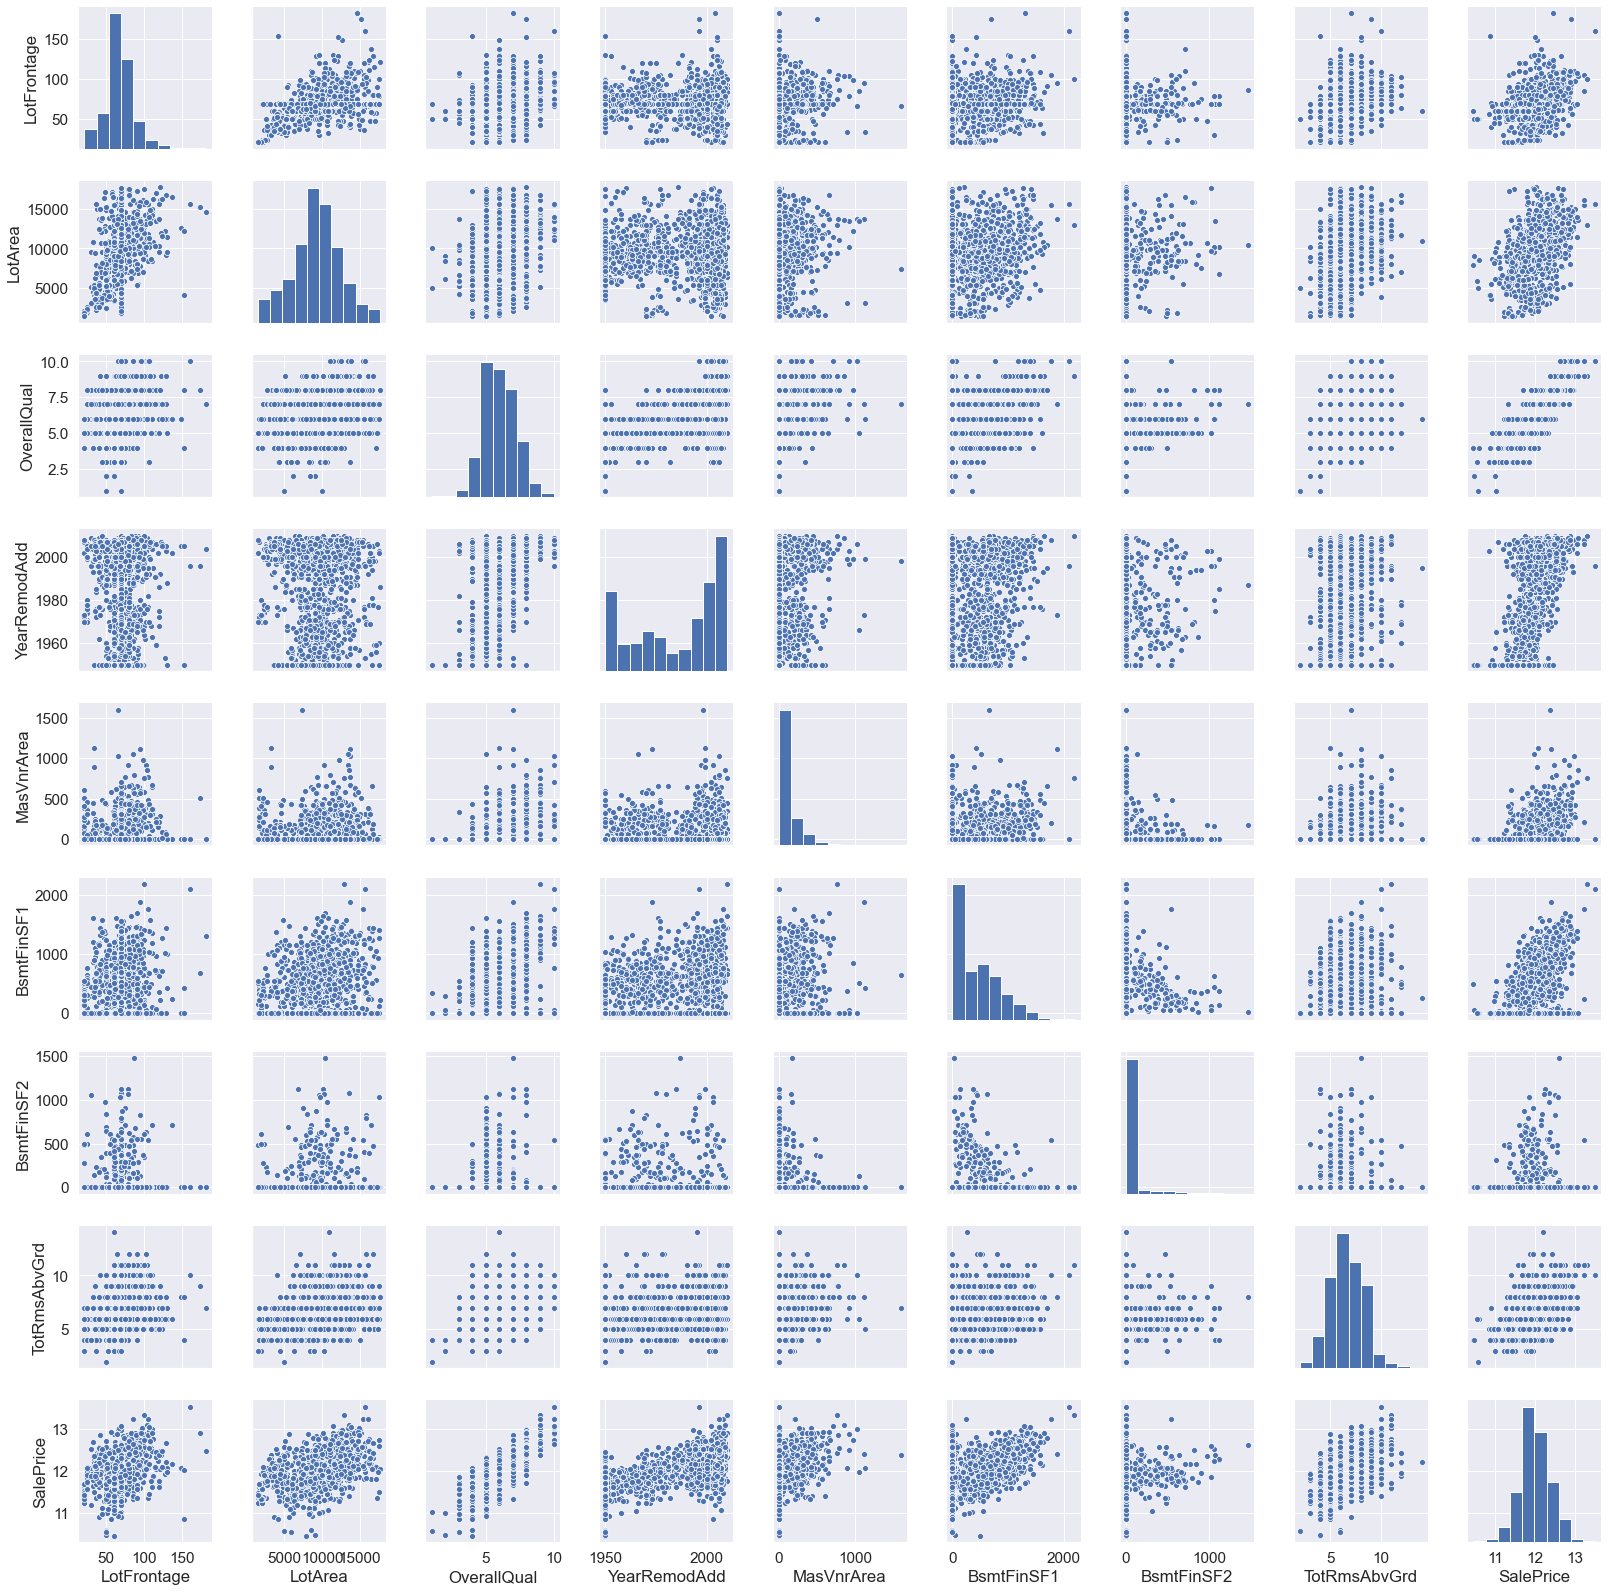

In [41]:
# All Linear model preparation
linanz1 = ['LotFrontage','LotArea','OverallQual','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
          'TotRmsAbvGrd','SalePrice']
linanz2 = ['GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','BsmtUnfSF','TotalBsmtSF','GrLivArea','1stFlrSF','2ndFlrSF',
          'SalePrice']
          
sns.set(font_scale=1.4)
sns.pairplot(housing[linanz1],palette="bright")

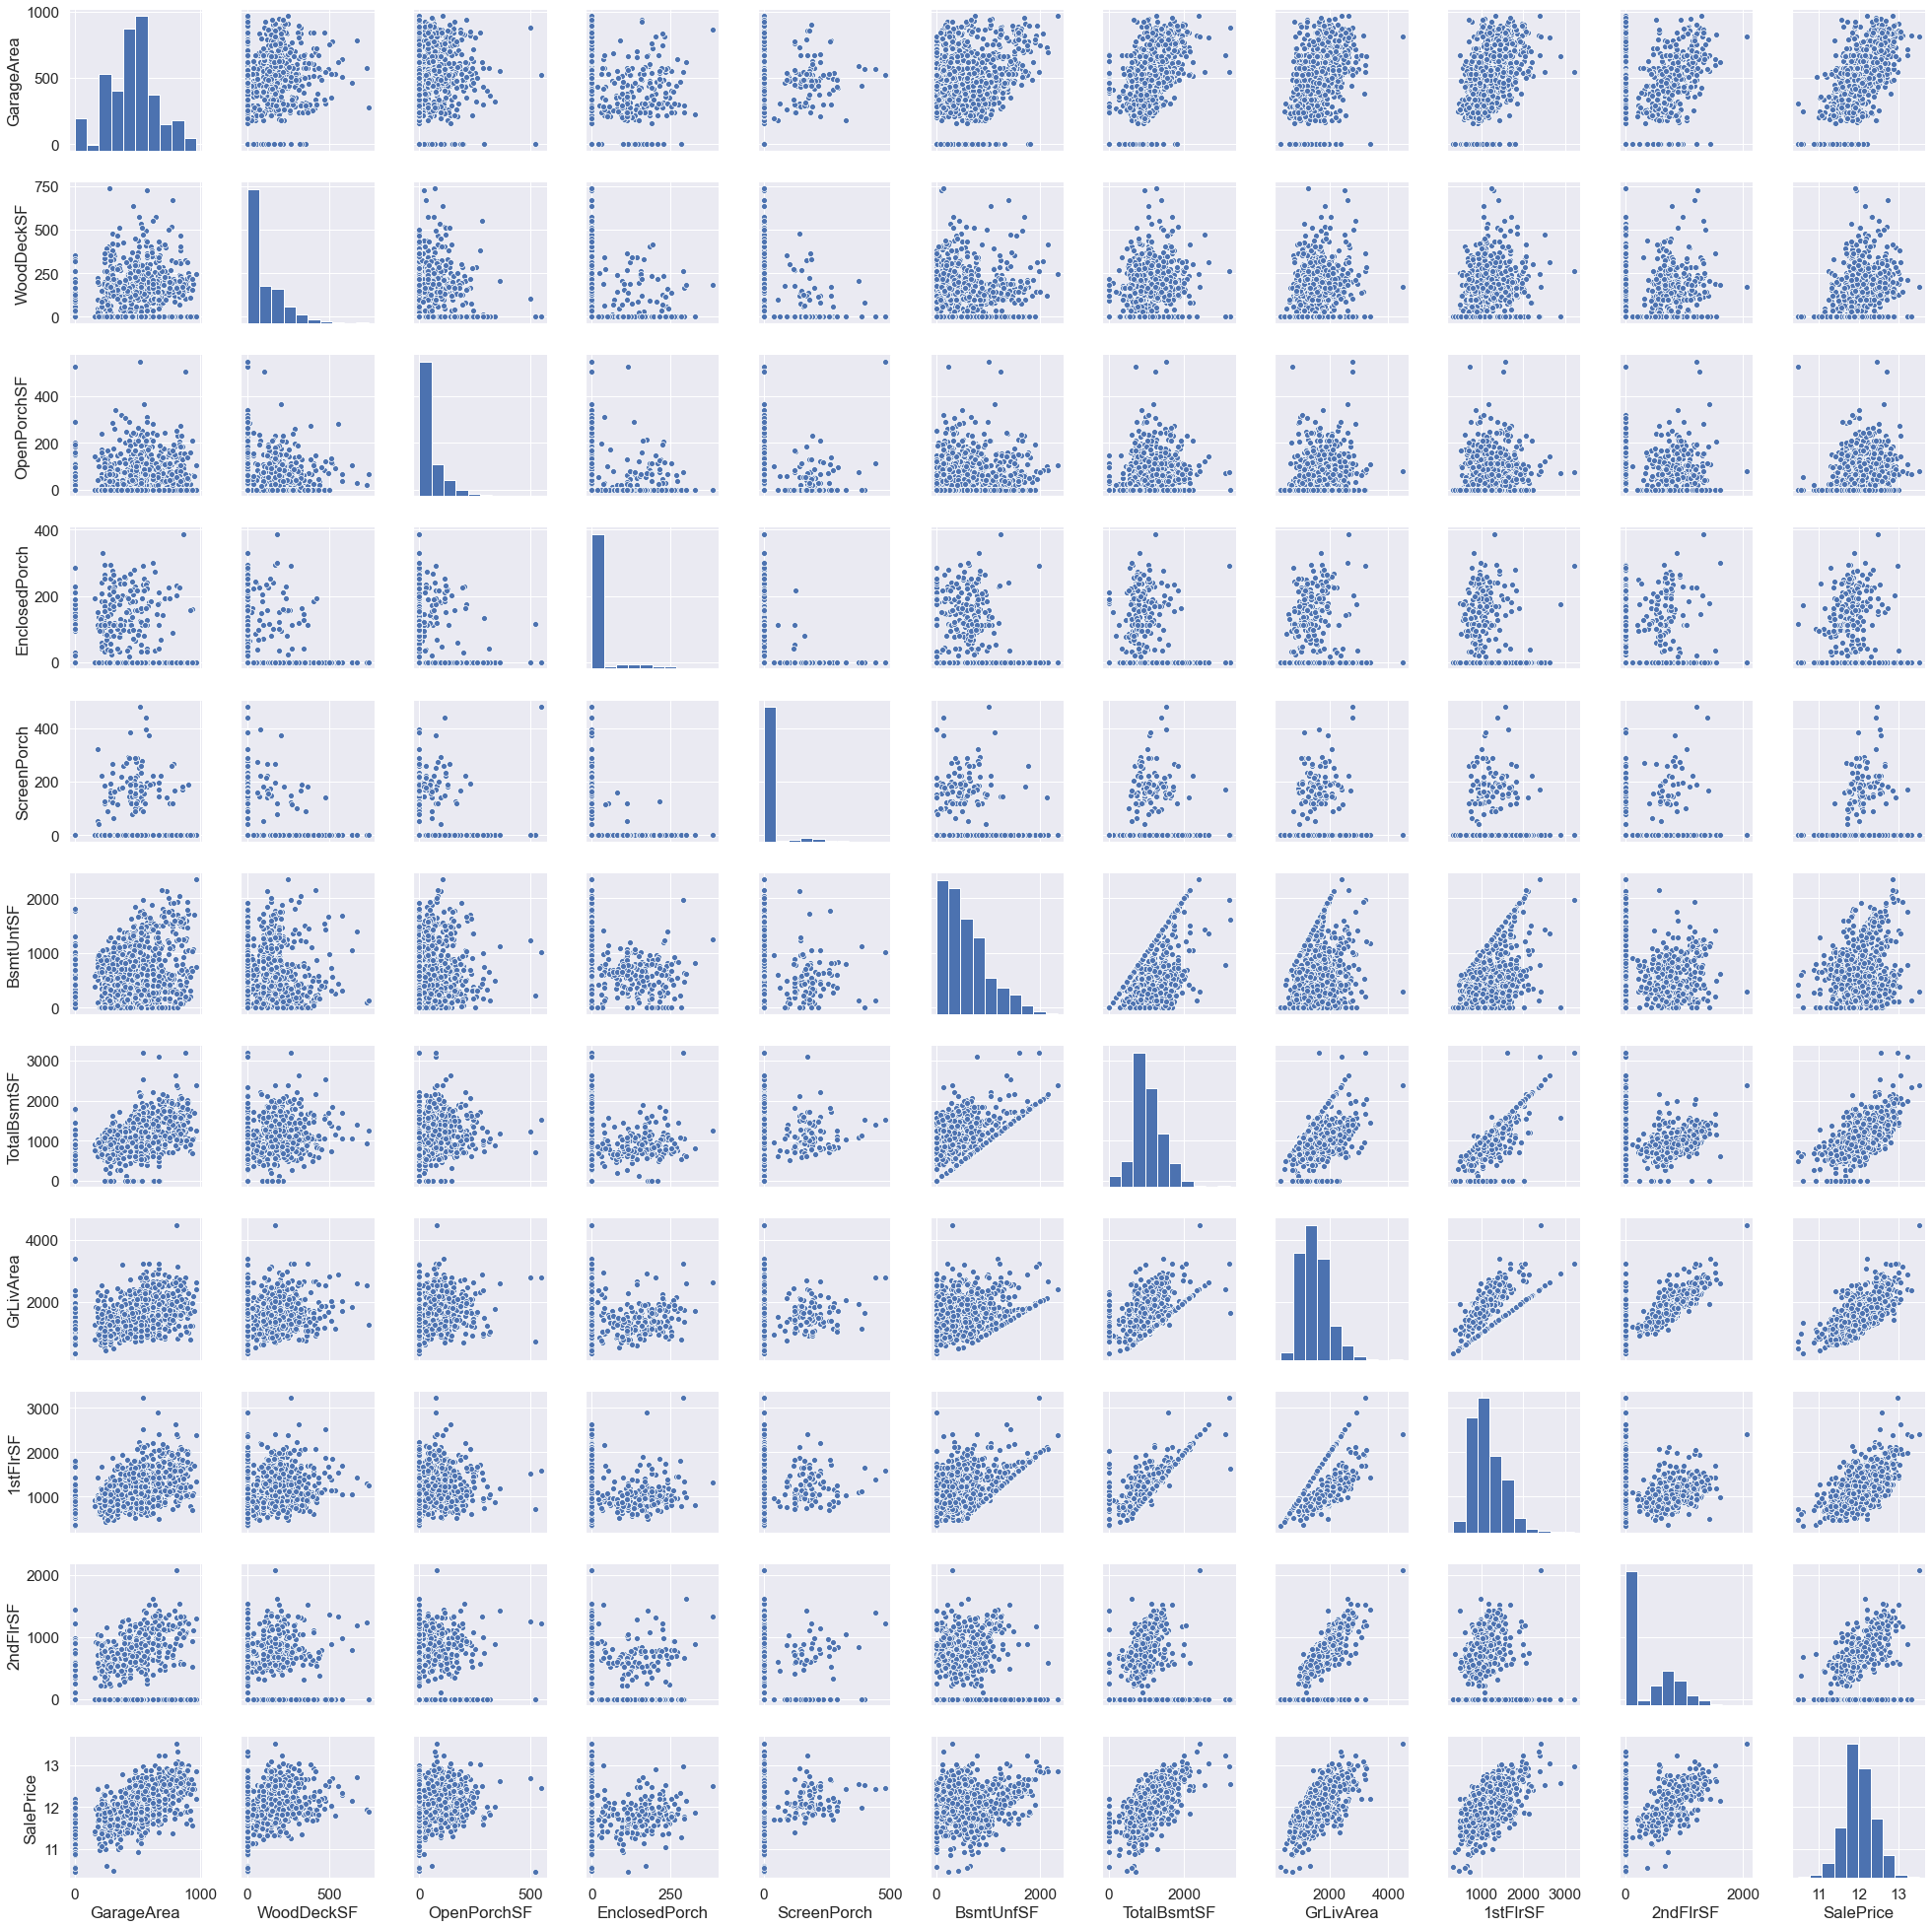

In [42]:
# Pairplot for other variables
sns.set(font_scale=1.4)
sns.pairplot(housing[linanz2],palette="bright")

### Data Preparation Model Building

#### Dummy variable encoding (one-hot) for other categorical variables

In [43]:
# Creating dummy variables for all categorical variables

housing = pd.get_dummies(housing, columns=non_numcols, drop_first = True)
housing.shape

(1379, 199)

#### Splitting the Data into Training and Testing Sets

In [44]:
# Remove Id columns
all_cols = list(housing.columns)
all_cols.remove("Id")

In [45]:
# Split data into housing train and test
housing_train, housing_test = train_test_split(housing[all_cols], train_size=0.70, test_size=0.30, random_state=100)
housing_train.shape, housing_test.shape

((965, 198), (414, 198))

#### Create X and y sets

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Columns: 199 entries, Id to SaleCondition_Partial
dtypes: float64(4), int64(45), uint8(150)
memory usage: 780.7 KB


In [47]:
# Create X and y
y_train = housing_train.pop("SalePrice")
X_train = housing_train

y_train.shape, X_train.shape

((965,), (965, 197))

In [48]:
# Create X and y (Test dataset)
y_test = housing_test.pop("SalePrice")
X_test = housing_test

y_test.shape, X_test.shape

((414,), (414, 197))

In [49]:
# Identify columns to scale
num2scale = num2anz.copy()
num2scale.remove("SalePrice")

#### Scaling the variables using StandardScaler (Normalizing)

In [50]:
# Scale training data using MinMaxScaler

# Instantiate object
scaler = StandardScaler()

# Scale training data using scaler
X_train[num2scale] = scaler.fit_transform(X_train[num2scale])

# Scale test data using scaler
X_test[num2scale] = scaler.transform(X_test[num2scale])


In [51]:
# Making a copy of X_train, X_test, y_train, y_test
X_train2 = X_train.copy()
X_test2 = X_test.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

### Ridge Regression

#### Tune hyperparameter using GridSearchCV

In [52]:
# Tune hyperparameter
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 120, 140, 160, 180, 200, 500, 1000 ]}

# Build model using Ridge regression
ridge = Ridge()

# Cross Validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)


scoring = scoring = ["r2","neg_mean_absolute_error"]

model_ridge = GridSearchCV(estimator=ridge, param_grid=params,scoring=scoring,
                          cv=folds,return_train_score=True,verbose=1,refit="r2")

model_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    2.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 120, 140, 160, 180, ...]},
             pre_dispatch='2*n_jobs', refit='r2', return_train_score=True,
             scoring=['r2', 'neg_mean_absolute_error'], verbose=1)

In [53]:
# Print results
cv_results = pd.DataFrame(model_ridge.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.096186      0.178417         0.007323        0.010175      0.0001   
1       0.006981      0.000630         0.001396        0.000489       0.001   
2       0.006383      0.000488         0.001995        0.000002        0.01   
3       0.006782      0.000399         0.001596        0.000488        0.05   
4       0.007772      0.001457         0.001594        0.000796         0.1   

              params  split0_test_r2  split1_test_r2  split2_test_r2  \
0  {'alpha': 0.0001}        0.897698        0.906753        0.863380   
1   {'alpha': 0.001}        0.897766        0.906847        0.863682   
2    {'alpha': 0.01}        0.898413        0.907598        0.865230   
3    {'alpha': 0.05}        0.900674        0.909283        0.867272   
4     {'alpha': 0.1}        0.902663        0.910384        0.868941   

   split3_test_r2  ...  mean_test_neg_mean_absolute_error  \
0        0.900709  ...                          -0.086508   
1        0.900756  ...                          -0.086462   
2        0.901195  ...                          -0.086165   
3        0.902748  ...                          -0.085680   
4        0.904171  ...                          -0.085262   

   std_test_neg_mean_absolute_error  rank_test_neg_mean_absolute_error  \
0                          0.004262                                 31   
1                          0.004220                                 30   
2                          0.004028                                 29   
3                          0.003883                                 28   
4                          0.003692                                 27   

   split0_train_neg_mean_absolute_error  split1_train_neg_mean_absolute_error  \
0                             -0.061970                             -0.062937   
1                             -0.061975                             -0.062941   
2                             -0.062019                             -0.062971   
3                             -0.062197                             -0.063108   
4                             -0.062383                             -0.063266   

   split2_train_neg_mean_absolute_error  split3_train_neg_mean_absolute_error  \
0                             -0.059395                             -0.061478   
1                             -0.059404                             -0.061480   
2                             -0.059495                             -0.061496   
3                             -0.059799                             -0.061580   
4                             -0.060076                             -0.061692   

   split4_train_neg_mean_absolute_error  mean_train_neg_mean_absolute_error  \
0                             -0.063449                           -0.061846   
1                             -0.063451                           -0.061850   
2                             -0.063478                           -0.061892   
3                             -0.063608                           -0.062058   
4                             -0.063797                           -0.062243   

   std_train_neg_mean_absolute_error  
0                           0.001409  
1                           0.001406  
2                           0.001385  
3                           0.001331  
4                           0.001302  

[5 rows x 36 columns]

#### Plotting scores to determine optimal alpha

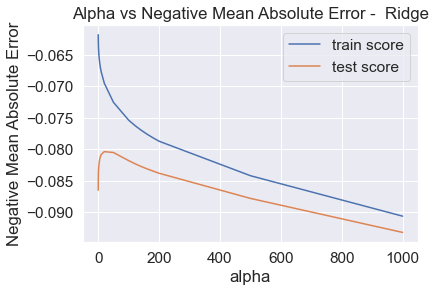

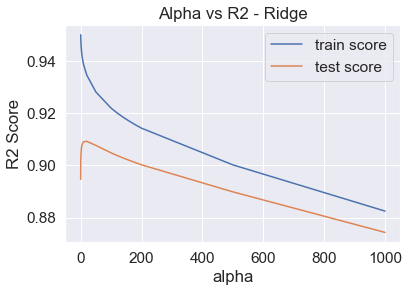

In [54]:
# plotting mean test and train scores with alpha 
x=cv_results["param_alpha"]
# y=cv_results["mean_train_score"]
# y1=cv_results["mean_test_score"]

y=cv_results["mean_train_neg_mean_absolute_error"]
y1=cv_results["mean_test_neg_mean_absolute_error"]
y2=cv_results["mean_train_r2"]
y3=cv_results["mean_test_r2"]


plt.plot(x,y)
plt.plot(x,y1)

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Alpha vs Negative Mean Absolute Error -  Ridge")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

plt.plot(x,y2)
plt.plot(x,y3)
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("Alpha vs R2 - Ridge")
plt.legend(['train score', 'test score'], loc='upper right')

#### Build Ridge regression model using best alpha

In [55]:
# Determine best alpha
best_ridge_score = model_ridge.best_score_
best_ridge_alpha = model_ridge.best_params_["alpha"]

print(" The best r2 score is {0} at alpha = {1}".format(best_ridge_score, best_ridge_alpha))

 The best r2 score is 0.90922239557208 at alpha = 20


In [56]:
# Model building using optimal alpha
ridge = Ridge(alpha=best_ridge_alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [57]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train.columns
cols = cols.insert(0, "constant")

ridge_coef = pd.DataFrame(model_parameters,cols)
ridge_coef.reset_index(inplace=True)
ridge_coef.columns = ["Feature","Value"]
ridge_coef

Feature   Value
0                 constant  11.792
1               MSSubClass  -0.011
2              LotFrontage   0.004
3                  LotArea   0.028
4              OverallQual   0.061
5              OverallCond   0.049
6             YearRemodAdd   0.012
7               MasVnrArea   0.002
8                ExterQual   0.008
9                ExterCond  -0.010
10                BsmtQual   0.014
11                BsmtCond  -0.006
12            BsmtExposure   0.011
13            BsmtFinType1   0.014
14              BsmtFinSF1   0.022
15            BsmtFinType2  -0.007
16              BsmtFinSF2   0.008
17               BsmtUnfSF   0.007
18             TotalBsmtSF   0.033
19               HeatingQC   0.014
20                1stFlrSF   0.040
21                2ndFlrSF   0.035
22            LowQualFinSF   0.003
23               GrLivArea   0.061
24            BsmtFullBath   0.020
25            BsmtHalfBath   0.002
26                FullBath   0.020
27                HalfBath   0.019
28            BedroomAbvGr  -0.003
29            KitchenAbvGr  -0.007
..                     ...     ...
168       Electrical_SBrkr  -0.000
169        Functional_Maj2  -0.038
170        Functional_Min1   0.016
171        Functional_Min2   0.012
172         Functional_Mod  -0.023
173         Functional_Typ   0.043
174      GarageType_Attchd   0.008
175     GarageType_Basment  -0.005
176     GarageType_BuiltIn   0.006
177     GarageType_CarPort  -0.010
178      GarageType_Detchd   0.010
179          GarageType_NA   0.001
180        GarageFinish_NA   0.001
181       GarageFinish_RFn  -0.002
182       GarageFinish_Unf  -0.007
183           PavedDrive_P  -0.002
184           PavedDrive_Y   0.032
185           SaleType_CWD   0.010
186           SaleType_Con   0.008
187         SaleType_ConLD   0.009
188         SaleType_ConLI  -0.010
189         SaleType_ConLw  -0.000
190           SaleType_New   0.034
191           SaleType_Oth   0.009
192            SaleType_WD  -0.014
193  SaleCondition_AdjLand   0.012
194   SaleCondition_Alloca  -0.001
195   SaleCondition_Family  -0.006
196   SaleCondition_Normal   0.050
197  SaleCondition_Partial   0.044

[198 rows x 2 columns]

#### Prediction using ridge regression

In [58]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9331
Ridge regression test r2:  0.9133


### Lasso Regression

#### Tune hyperparameter using GridSearchCV

In [59]:
# Tune hyperparameter

params = {'alpha': [0.00001, 0.00005, 0.0001,0.0002, 0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008]}



# Build model using Lasso regression
lasso = Lasso()

# Cross Validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

scoring = scoring = ["r2","neg_mean_absolute_error"]

model_lasso = GridSearchCV(estimator=lasso, param_grid=params,scoring=scoring,
                          cv=folds,return_train_score=True,verbose=1,refit="r2")

model_lasso.fit(X_train2,y_train2)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2160289422360093, tolerance: 0.011402188888639387
  positive)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9811720618561905, tolerance: 0.011578632139069853
  positive)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7146676349898198, tolerance: 0.011209506272326256
  positive)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarnin

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0005, 0.001,
                                   0.002, 0.003, 0.004, 0.005, 0.006, 0.007,
                                   0.008]},
             pre_dispatch='2*n_jobs', refit='r2', return_train_score=True,
             scoring=['r2', 'neg_mean_absolute_error'], verbose=1)

In [60]:
# Print results
cv_results = pd.DataFrame(model_lasso.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.153130      0.095060         0.002488        0.000910       1e-05   
1       0.070209      0.017022         0.002595        0.000797       5e-05   
2       0.080990      0.005796         0.001988        0.000012      0.0001   
3       0.063032      0.011482         0.002194        0.000399      0.0002   
4       0.026331      0.003710         0.001800        0.000760      0.0005   

              params  split0_test_r2  split1_test_r2  split2_test_r2  \
0   {'alpha': 1e-05}        0.900032        0.910048        0.866531   
1   {'alpha': 5e-05}        0.906497        0.913735        0.871289   
2  {'alpha': 0.0001}        0.911921        0.917662        0.876078   
3  {'alpha': 0.0002}        0.918049        0.920952        0.879198   
4  {'alpha': 0.0005}        0.925538        0.920223        0.882445   

   split3_test_r2  ...  mean_test_neg_mean_absolute_error  \
0        0.902739  ...                          -0.085684   
1        0.909423  ...                          -0.084143   
2        0.913706  ...                          -0.082916   
3        0.917046  ...                          -0.081907   
4        0.922362  ...                          -0.080318   

   std_test_neg_mean_absolute_error  rank_test_neg_mean_absolute_error  \
0                          0.004133                                  9   
1                          0.003718                                  7   
2                          0.003246                                  5   
3                          0.003571                                  4   
4                          0.003940                                  2   

   split0_train_neg_mean_absolute_error  split1_train_neg_mean_absolute_error  \
0                             -0.062242                             -0.063115   
1                             -0.063151                             -0.063945   
2                             -0.064346                             -0.065088   
3                             -0.066447                             -0.066978   
4                             -0.070183                             -0.069710   

   split2_train_neg_mean_absolute_error  split3_train_neg_mean_absolute_error  \
0                             -0.059790                             -0.061595   
1                             -0.060826                             -0.062273   
2                             -0.062120                             -0.063435   
3                             -0.064219                             -0.065434   
4                             -0.066932                             -0.068344   

   split4_train_neg_mean_absolute_error  mean_train_neg_mean_absolute_error  \
0                             -0.063702                           -0.062089   
1                             -0.064773                           -0.062994   
2                             -0.066063                           -0.064210   
3                             -0.067548                           -0.066125   
4                             -0.069927                           -0.069019   

   std_train_neg_mean_absolute_error  
0                           0.001357  
1                           0.001365  
2                           0.001356  
3                           0.001180  
4                           0.001222  

[5 rows x 36 columns]

#### Plotting scores to determine optimal alpha

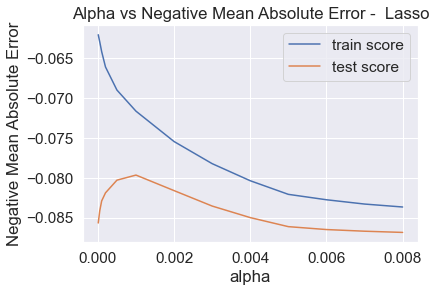

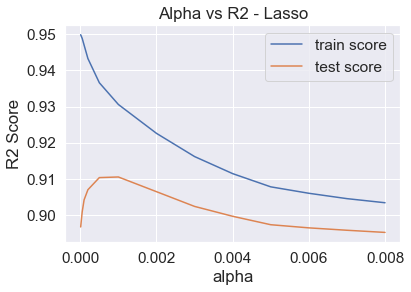

In [61]:
# plotting mean test and train scoes with alpha 
x=cv_results["param_alpha"]

y=cv_results["mean_train_neg_mean_absolute_error"]
y1=cv_results["mean_test_neg_mean_absolute_error"]
y2=cv_results["mean_train_r2"]
y3=cv_results["mean_test_r2"]


plt.plot(x,y)
plt.plot(x,y1)

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Alpha vs Negative Mean Absolute Error -  Lasso")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

plt.plot(x,y2)
plt.plot(x,y3)
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("Alpha vs R2 - Lasso")
plt.legend(['train score', 'test score'], loc='upper right')

#### Build Lasso regression model using best alpha

In [62]:
# Determine best alpha
best_lasso_score = model_lasso.best_score_
best_lasso_alpha = model_lasso.best_params_["alpha"]

print(" The best r2 score is {0} at alpha = {1}".format(best_lasso_score, best_lasso_alpha))

 The best r2 score is 0.9104922472960713 at alpha = 0.001


In [63]:
# Model building using optimal alpha
lasso = Lasso(alpha=best_lasso_alpha)
lasso.fit(X_train2, y_train2)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
# Lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train.columns
cols = cols.insert(0, "constant")

lasso_coef = pd.DataFrame(model_parameters,cols)
lasso_coef.reset_index(inplace=True)
lasso_coef.columns = ["Feature","Value"]
lasso_coef

Feature   Value
0                 constant  11.803
1               MSSubClass  -0.007
2              LotFrontage   0.003
3                  LotArea   0.026
4              OverallQual   0.068
5              OverallCond   0.050
6             YearRemodAdd   0.009
7               MasVnrArea   0.001
8                ExterQual   0.007
9                ExterCond  -0.008
10                BsmtQual   0.009
11                BsmtCond  -0.003
12            BsmtExposure   0.011
13            BsmtFinType1   0.012
14              BsmtFinSF1   0.017
15            BsmtFinType2  -0.004
16              BsmtFinSF2   0.002
17               BsmtUnfSF  -0.000
18             TotalBsmtSF   0.037
19               HeatingQC   0.014
20                1stFlrSF   0.012
21                2ndFlrSF   0.000
22            LowQualFinSF   0.000
23               GrLivArea   0.109
24            BsmtFullBath   0.020
25            BsmtHalfBath   0.001
26                FullBath   0.014
27                HalfBath   0.016
28            BedroomAbvGr  -0.000
29            KitchenAbvGr  -0.004
..                     ...     ...
168       Electrical_SBrkr   0.000
169        Functional_Maj2  -0.004
170        Functional_Min1   0.000
171        Functional_Min2   0.000
172         Functional_Mod  -0.000
173         Functional_Typ   0.036
174      GarageType_Attchd   0.000
175     GarageType_Basment  -0.000
176     GarageType_BuiltIn   0.000
177     GarageType_CarPort  -0.000
178      GarageType_Detchd   0.000
179          GarageType_NA   0.000
180        GarageFinish_NA   0.000
181       GarageFinish_RFn   0.000
182       GarageFinish_Unf  -0.002
183           PavedDrive_P  -0.000
184           PavedDrive_Y   0.024
185           SaleType_CWD   0.000
186           SaleType_Con   0.000
187         SaleType_ConLD   0.000
188         SaleType_ConLI  -0.000
189         SaleType_ConLw   0.000
190           SaleType_New   0.000
191           SaleType_Oth   0.000
192            SaleType_WD  -0.000
193  SaleCondition_AdjLand   0.000
194   SaleCondition_Alloca  -0.000
195   SaleCondition_Family  -0.000
196   SaleCondition_Normal   0.052
197  SaleCondition_Partial   0.097

[198 rows x 2 columns]

#### Prediction using lasso regression

In [65]:
# Prediction using lasso regression
y_train_lasso_pred = lasso.predict(X_train2)
print("Lasso regression train r2: ",round(metrics.r2_score(y_true=y_train2, y_pred=y_train_lasso_pred),4))
y_test_lasso_pred = lasso.predict(X_test2)
print("Lasso regression test r2: ",round(metrics.r2_score(y_true=y_test2, y_pred=y_test_lasso_pred),4))

Lasso regression train r2:  0.9281
Lasso regression test r2:  0.9122


#### Lasso model does not address multicollinearity issue.

In [66]:
# Check VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
selectedcols = list(lasso_coef[lasso_coef["Value"]!=0]["Feature"].values)
selectedcols.remove("constant")

X_train4 = X_train2[selectedcols]

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X_train4.columns
vif["VIF"] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
print(""*80)
print(" "*10,"VIF Details"," "*10)
print("="*80)
print(vif.sort_values(by="VIF",ascending=False))

C:\Users\rush2\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
C:\Users\rush2\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\rush2\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\rush2\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)



           VIF Details           
                 Feature    VIF
39           MSZoning_RL  28.88
57          CentralAir_Y  21.03
61          PavedDrive_Y  18.37
59        Functional_Typ  16.61
51       Condition1_Norm  10.90
62  SaleCondition_Normal   9.69
19             GrLivArea   7.80
40           MSZoning_RM   6.97
18              1stFlrSF   6.47
16           TotalBsmtSF   6.41
29            GarageCars   6.40
38           AgeWhenSold   6.33
30            GarageArea   6.17
28           FireplaceQu   4.98
27            Fireplaces   4.80
56      Foundation_PConc   4.64
9               BsmtQual   4.56
26          TotRmsAbvGrd   4.22
3            OverallQual   4.07
41      LotConfig_Inside   3.94
60      GarageFinish_Unf   3.92
13            BsmtFinSF1   3.68
22              FullBath   3.06
7              ExterQual   3.01
14          BsmtFinType2   2.94
15            BsmtFinSF2   2.87
5           YearRemodAdd   2.86
48  Neighborhood_Somerst   2.82
10              BsmtCond   2.77
12   

In [67]:
# This functions return the model statistics and VIF for the independent variables.
def createmodel(features):
    selected_features=features
    
    X_train = X_train4[selected_features]
    
    
    # Build model with selected features
    
    # Add constant
    X_train_sm = sm.add_constant(X_train)

    # Create object
    lr = sm.OLS(y_train2,X_train_sm)

    # Fit model
    lr_model = lr.fit()

    # Summary
    print(lr_model.summary())
    print(" "*80)
    
    # VIF calculation
    vif = pd.DataFrame()
    vif["Feature"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    print(""*80)
    print(" "*10,"VIF Details"," "*10)
    print("="*80)
    print(vif.sort_values(by="VIF",ascending=False))
    return X_train_sm,lr_model

In [68]:
# Remove CentralAir_Y
selected_features = selectedcols

selected_features.remove("CentralAir_Y")

X_train_sm, lr_model = createmodel(selected_features)

C:\Users\rush2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:                 858.77
No. Observations:                 965   AIC:                            -1590.
Df Residuals:                     901   BIC:                            -1278.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.72

In [69]:
# Remove Functional_Typ  
selected_features = selectedcols

selected_features.remove("Functional_Typ")

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     201.3
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:52:00   Log-Likelihood:                 855.54
No. Observations:                 965   AIC:                            -1585.
Df Residuals:                     902   BIC:                            -1278.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.76

C:\Users\rush2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



           VIF Details           
                 Feature    VIF
39           MSZoning_RL  23.03
59          PavedDrive_Y  16.60
51       Condition1_Norm  10.39
60  SaleCondition_Normal   9.62
19             GrLivArea   7.80
29            GarageCars   6.38
16           TotalBsmtSF   6.34
18              1stFlrSF   6.27
38           AgeWhenSold   6.22
30            GarageArea   6.17
40           MSZoning_RM   5.85
28           FireplaceQu   4.98
27            Fireplaces   4.79
9               BsmtQual   4.55
56      Foundation_PConc   4.53
26          TotRmsAbvGrd   4.20
3            OverallQual   4.01
58      GarageFinish_Unf   3.91
41      LotConfig_Inside   3.90
13            BsmtFinSF1   3.68
22              FullBath   3.05
7              ExterQual   3.00
14          BsmtFinType2   2.92
15            BsmtFinSF2   2.86
5           YearRemodAdd   2.84
12          BsmtFinType1   2.75
10              BsmtCond   2.75
25           KitchenQual   2.64
48  Neighborhood_Somerst   2.54
20   

In [70]:
# Remove GrLivArea  
selected_features = selectedcols

selected_features.remove("GrLivArea")

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     176.8
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:52:00   Log-Likelihood:                 789.71
No. Observations:                 965   AIC:                            -1455.
Df Residuals:                     903   BIC:                            -1153.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.78

C:\Users\rush2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



           VIF Details           
                 Feature    VIF
38           MSZoning_RL  22.96
58          PavedDrive_Y  16.56
50       Condition1_Norm  10.39
59  SaleCondition_Normal   9.62
28            GarageCars   6.33
16           TotalBsmtSF   6.32
29            GarageArea   6.10
37           AgeWhenSold   5.87
39           MSZoning_RM   5.85
18              1stFlrSF   5.58
27           FireplaceQu   4.97
26            Fireplaces   4.75
9               BsmtQual   4.54
55      Foundation_PConc   4.51
3            OverallQual   3.96
57      GarageFinish_Unf   3.91
40      LotConfig_Inside   3.90
13            BsmtFinSF1   3.68
7              ExterQual   2.99
14          BsmtFinType2   2.92
15            BsmtFinSF2   2.86
5           YearRemodAdd   2.84
10              BsmtCond   2.75
12          BsmtFinType1   2.74
21              FullBath   2.66
24           KitchenQual   2.64
25          TotRmsAbvGrd   2.54
47  Neighborhood_Somerst   2.53
19          BsmtFullBath   2.48
0    

In [71]:
# Remove MSZoning_RL    
selected_features = selectedcols

selected_features.remove("MSZoning_RL")

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:52:01   Log-Likelihood:                 788.51
No. Observations:                 965   AIC:                            -1455.
Df Residuals:                     904   BIC:                            -1158.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.81

C:\Users\rush2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



           VIF Details           
                  Feature    VIF
57           PavedDrive_Y  11.76
49        Condition1_Norm   9.28
58   SaleCondition_Normal   8.13
28             GarageCars   6.33
16            TotalBsmtSF   6.32
29             GarageArea   6.09
37            AgeWhenSold   5.83
18               1stFlrSF   5.58
27            FireplaceQu   4.96
26             Fireplaces   4.75
9                BsmtQual   4.52
54       Foundation_PConc   4.36
3             OverallQual   3.96
56       GarageFinish_Unf   3.86
39       LotConfig_Inside   3.80
13             BsmtFinSF1   3.68
7               ExterQual   2.99
14           BsmtFinType2   2.92
15             BsmtFinSF2   2.86
5            YearRemodAdd   2.84
10               BsmtCond   2.75
12           BsmtFinType1   2.74
21               FullBath   2.66
24            KitchenQual   2.64
25           TotRmsAbvGrd   2.54
19           BsmtFullBath   2.47
0              MSSubClass   2.36
38            MSZoning_RM   2.30
2       

In [72]:
# Predict using statsmodel api
y_pred_sm = lr_model.predict(X_train_sm)

In [73]:
# Prediction on test
# Create X_test, y_test set

X_test_2 = X_test[selected_features]

# Add constant
X_test_sm = sm.add_constant(X_test_2)

# Pred on test set
y_test_pred = lr_model.predict(X_test_sm)

C:\Users\rush2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [74]:
# Prediction using statsmodel api linear regression
print("sm train r2: ",round(metrics.r2_score(y_true=y_train2, y_pred=y_pred_sm),4))
print("sm test r2: ",round(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred),4))

sm train r2:  0.9225
sm test r2:  0.8912


### Conclusion
We will use lasso for final model prediction since:
1. The scores are higher and consistent
2. Model is simpler than ridge (less number of variables).

Final score of model:
1. Lasso regression train r2:  0.9281
2. Lasso regression test r2:  0.9122

### Subjective Questions

#### Q1 - Setup to understand behaviour of model if alpha is changed

In [75]:
# Best score
print("Best ridge alpha: ",best_ridge_alpha)
print("Best lasso alphs: ",best_lasso_alpha)

Best ridge alpha:  20
Best lasso alphs:  0.001


#### Ridge model when alpha is doubled (optimal alpha=20)

In [76]:
# Model building using double optimal alpha
double_alpha = 2 * best_ridge_alpha
ridge_double = Ridge(alpha=double_alpha)
ridge_double.fit(X_train, y_train)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [77]:
# Ridge model parameters
model_parameters = list(ridge_double.coef_)
model_parameters.insert(0, ridge_double.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))


ridge_double_coef = pd.DataFrame(model_parameters,cols)
ridge_double_coef.reset_index(inplace=True)
ridge_double_coef.columns = ["Feature","Value"]
ridge_double_coef.sort_values(by="Value",inplace=True,ascending=False)
ridge_double_coef

Feature   Value
0                 constant  11.848
4              OverallQual   0.062
23               GrLivArea   0.058
71    Neighborhood_Crawfor   0.055
5              OverallCond   0.048
20                1stFlrSF   0.039
196   SaleCondition_Normal   0.039
197  SaleCondition_Partial   0.034
18             TotalBsmtSF   0.033
173         Functional_Typ   0.032
91         Condition1_Norm   0.032
21                2ndFlrSF   0.032
87    Neighborhood_StoneBr   0.029
124    Exterior1st_BrkFace   0.029
190           SaleType_New   0.029
86    Neighborhood_Somerst   0.028
184           PavedDrive_Y   0.027
3                  LotArea   0.027
155       Foundation_PConc   0.025
48             MSZoning_FV   0.022
14              BsmtFinSF1   0.022
68    Neighborhood_BrkSide   0.022
37              GarageQual   0.021
26                FullBath   0.021
50             MSZoning_RL   0.021
36              GarageArea   0.020
27                HalfBath   0.019
164           CentralAir_Y   0.019
24            BsmtFullBath   0.019
56         LandContour_HLS   0.017
..                     ...     ...
15            BsmtFinType2  -0.007
195   SaleCondition_Family  -0.007
63        LotConfig_Inside  -0.007
88     Neighborhood_Timber  -0.008
158        Foundation_Wood  -0.008
135    Exterior1st_WdShing  -0.008
154      Foundation_CBlock  -0.008
70    Neighborhood_CollgCr  -0.009
1               MSSubClass  -0.009
137    Exterior2nd_Brk Cmn  -0.010
57         LandContour_Low  -0.010
9                ExterCond  -0.010
85    Neighborhood_SawyerW  -0.011
108      HouseStyle_1Story  -0.011
161           Heating_Grav  -0.012
123    Exterior1st_BrkComm  -0.013
82    Neighborhood_OldTown  -0.013
51             MSZoning_RM  -0.013
75    Neighborhood_MeadowV  -0.014
192            SaleType_WD  -0.014
134    Exterior1st_Wd Sdng  -0.014
172         Functional_Mod  -0.015
79     Neighborhood_NWAmes  -0.016
105         BldgType_Twnhs  -0.017
94         Condition1_RRAe  -0.018
73    Neighborhood_Gilbert  -0.021
72    Neighborhood_Edwards  -0.022
74     Neighborhood_IDOTRR  -0.023
169        Functional_Maj2  -0.023
47             AgeWhenSold  -0.046

[198 rows x 2 columns]

#### Lasso model when alpha is doubled (optimal alpha=0.001)

In [78]:
# Model building using optimal alpha
double_alpha = 2 * best_lasso_alpha
lasso_double = Lasso(alpha=double_alpha)
lasso_double.fit(X_train2, y_train2)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
# Lasso model parameters
model_parameters = list(lasso_double.coef_)
model_parameters.insert(0, lasso_double.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train2.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))


lasso_double_coef = pd.DataFrame(model_parameters,cols)
lasso_double_coef.reset_index(inplace=True)
lasso_double_coef.columns = ["Feature","Value"]
lasso_double_coef.sort_values(by="Value",inplace=True,ascending=False)
lasso_double_coef

Feature   Value
0                 constant  11.899
23               GrLivArea   0.111
71    Neighborhood_Crawfor   0.088
4              OverallQual   0.074
197  SaleCondition_Partial   0.070
5              OverallCond   0.050
18             TotalBsmtSF   0.039
196   SaleCondition_Normal   0.033
3                  LotArea   0.026
91         Condition1_Norm   0.025
155       Foundation_PConc   0.023
36              GarageArea   0.022
37              GarageQual   0.020
86    Neighborhood_Somerst   0.019
24            BsmtFullBath   0.018
33             FireplaceQu   0.018
14              BsmtFinSF1   0.018
173         Functional_Typ   0.017
30             KitchenQual   0.017
27                HalfBath   0.015
19               HeatingQC   0.015
184           PavedDrive_Y   0.014
35              GarageCars   0.014
26                FullBath   0.013
20                1stFlrSF   0.012
13            BsmtFinType1   0.011
43             ScreenPorch   0.010
129    Exterior1st_MetalSd   0.010
12            BsmtExposure   0.009
68    Neighborhood_BrkSide   0.009
..                     ...     ...
110      HouseStyle_2.5Unf   0.000
111      HouseStyle_2Story  -0.000
112      HouseStyle_SFoyer  -0.000
95         Condition1_RRAn  -0.000
96         Condition1_RRNe   0.000
83      Neighborhood_SWISU  -0.000
84     Neighborhood_Sawyer   0.000
75    Neighborhood_MeadowV  -0.000
76    Neighborhood_Mitchel  -0.000
77      Neighborhood_NAmes   0.000
78    Neighborhood_NPkVill   0.000
79     Neighborhood_NWAmes  -0.000
80    Neighborhood_NoRidge  -0.000
81    Neighborhood_NridgHt   0.000
82    Neighborhood_OldTown  -0.000
93         Condition1_PosN   0.000
99         Condition2_Norm   0.000
85    Neighborhood_SawyerW  -0.000
87    Neighborhood_StoneBr   0.000
88     Neighborhood_Timber  -0.000
89    Neighborhood_Veenker   0.000
90        Condition1_Feedr   0.000
92         Condition1_PosA  -0.000
15            BsmtFinType2  -0.001
29            KitchenAbvGr  -0.003
45                 MiscVal  -0.003
1               MSSubClass  -0.007
9                ExterCond  -0.007
51             MSZoning_RM  -0.027
47             AgeWhenSold  -0.060

[198 rows x 2 columns]

#### Q3 - New model by removing top 5 predictor variables

#### Ridge model without top5 predictors

In [80]:
# Take absolute value of coeffecients and determine top5
ridgetopcoef = ridge_coef
ridgetopcoef["Value"] = ridgetopcoef["Value"].apply(lambda c:np.abs(c))
ridgetopcoef.sort_values(by="Value",ascending=False,inplace=True)
ridgetopcoef.head(10)

Feature   Value
0                 constant  11.792
71    Neighborhood_Crawfor   0.077
23               GrLivArea   0.061
4              OverallQual   0.061
47             AgeWhenSold   0.051
196   SaleCondition_Normal   0.050
5              OverallCond   0.049
87    Neighborhood_StoneBr   0.045
197  SaleCondition_Partial   0.044
173         Functional_Typ   0.043

In [81]:
# Top 5 predictors for ridge regression
ridgetopcoef2 = ridgetopcoef.sort_values(by="Value",ascending=False)["Feature"][1:20].apply(lambda c:c.split("_")[0])
ridgetop5 = []
for col in ridgetopcoef2:
    if col not in ridgetop5 and col != "constant":
        ridgetop5.append(col)

ridgetop5 = ridgetop5[:5]
ridgetop5

['Neighborhood', 'GrLivArea', 'OverallQual', 'AgeWhenSold', 'SaleCondition']

In [82]:
# Identify all dummy avriables that need to be dropped
ridge_cols = list(X_train.columns)

ridgecols2drop = []

for top in ridgetop5:
    for col in ridge_cols:
        if col.startswith(top):
            ridgecols2drop.append(col)

In [83]:
# Preparing new X_train and X_test
X_train_without_top5pred = X_train.drop(ridgecols2drop,axis=1)
print(X_train_without_top5pred.shape, X_train.shape)

X_test_without_top5pred = X_test.drop(ridgecols2drop,axis=1)
print(X_test_without_top5pred.shape, X_test.shape)

(965, 165) (965, 197)
(414, 165) (414, 197)


In [84]:
# Model building by removing top 5 predictors
ridge_newtop5 = Ridge(alpha=best_ridge_alpha)
ridge_newtop5.fit(X_train_without_top5pred, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [85]:
# Ridge model parameters
model_parameters = list(ridge_newtop5.coef_)
model_parameters.insert(0, ridge_newtop5.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train_without_top5pred.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))


ridge_newtop5_coef = pd.DataFrame(model_parameters,cols)
ridge_newtop5_coef.reset_index(inplace=True)
ridge_newtop5_coef.columns = ["Feature","Value"]
ridge_newtop5_coef.sort_values(by="Value",ascending=False).head(10)

Feature   Value
0               constant  11.779
19              1stFlrSF   0.084
20              2ndFlrSF   0.081
45           MSZoning_FV   0.061
146       Functional_Typ   0.056
157         PavedDrive_Y   0.051
4            OverallCond   0.047
163         SaleType_New   0.045
64       Condition1_Norm   0.045
97   Exterior1st_BrkFace   0.043

In [86]:
# Prediction using ridge regression
y_train_ridge_pred = ridge_newtop5.predict(X_train_without_top5pred)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge_newtop5.predict(X_test_without_top5pred)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9143
Ridge regression test r2:  0.8865


#### Lasso model without top5 predictors

In [87]:
# Take absolute value of coeffecients and determine top5
lassotopcoef = lasso_coef
lassotopcoef["Value"] = lassotopcoef["Value"].apply(lambda c:np.abs(c))
lassotopcoef.sort_values(by="Value",ascending=False,inplace=True)
lassotopcoef.head(10)

Feature   Value
0                 constant  11.803
71    Neighborhood_Crawfor   0.119
23               GrLivArea   0.109
197  SaleCondition_Partial   0.097
4              OverallQual   0.068
86    Neighborhood_Somerst   0.067
47             AgeWhenSold   0.058
87    Neighborhood_StoneBr   0.054
196   SaleCondition_Normal   0.052
5              OverallCond   0.050

In [88]:
# Top 5 predictors for lasso regression
lassotopcoef2 = lassotopcoef.sort_values(by="Value",ascending=False)["Feature"][1:20].apply(lambda c:c.split("_")[0])
lassotop5 = []
for col in lassotopcoef2:
    if col not in lassotop5 and col != "constant":
        lassotop5.append(col)

lassotop5 = lassotop5[:5]
lassotop5

['Neighborhood', 'GrLivArea', 'SaleCondition', 'OverallQual', 'AgeWhenSold']

In [89]:
# Identify all dummy variables that need to be dropped
lasso_cols = list(X_train2.columns)

lassocols2drop = []

for top in lassotop5:
    for col in lasso_cols:
        if col.startswith(top):
            lassocols2drop.append(col)

In [90]:
# Preparing new X_train and X_test
X_train2_without_top5pred = X_train2.drop(lassocols2drop,axis=1)
print(X_train2_without_top5pred.shape, X_train2.shape)

X_test2_without_top5pred = X_test2.drop(lassocols2drop,axis=1)
print(X_test2_without_top5pred.shape, X_test2.shape)

(965, 165) (965, 197)
(414, 165) (414, 197)


In [91]:
# Model building using optimal alpha
lasso_newtop5 = Lasso(alpha=best_lasso_alpha)
lasso_newtop5.fit(X_train2_without_top5pred, y_train2)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
# Lasso model parameters
model_parameters = list(lasso_newtop5.coef_)
model_parameters.insert(0, lasso_newtop5.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train2_without_top5pred.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))

lasso_newtop5_coef = pd.DataFrame(model_parameters,cols)
lasso_newtop5_coef.reset_index(inplace=True)
lasso_newtop5_coef.columns = ["Feature","Value"]
lasso_newtop5_coef.sort_values(by="Value",ascending=False).head(10)

Feature   Value
0            constant  11.754
19           1stFlrSF   0.100
20           2ndFlrSF   0.092
45        MSZoning_FV   0.091
146    Functional_Typ   0.071
157      PavedDrive_Y   0.055
163      SaleType_New   0.054
4         OverallCond   0.048
128  Foundation_PConc   0.047
47        MSZoning_RL   0.045

In [93]:
# Prediction using ridge regression
y_train_lasso_pred = lasso_newtop5.predict(X_train2_without_top5pred)
print("Lasso regression train r2: ",round(metrics.r2_score(y_true=y_train2, y_pred=y_train_lasso_pred),4))
y_test_lasso_pred = lasso_newtop5.predict(X_test2_without_top5pred)
print("Lasso regression test r2: ",round(metrics.r2_score(y_true=y_test2, y_pred=y_test_lasso_pred),4))

Lasso regression train r2:  0.9094
Lasso regression test r2:  0.8903


#### Checking distribution of error term

Text(0.5, 0, 'Errors')

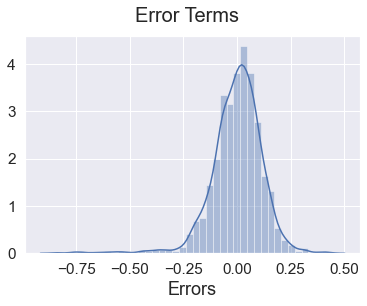

In [94]:
# Prediction using lasso regression
len(y_train_lasso_pred), len(y_test_lasso_pred)

# Merging prediction for train and test
X_train["lasso_prediction"] = y_train_lasso_pred
X_test["lasso_prediction"] = y_test_lasso_pred

X_preds = pd.concat([X_train["lasso_prediction"], X_test["lasso_prediction"]])

# Adding prediction to actual dataframe
housing["lasso_prediction"] = X_preds

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((housing["SalePrice"] - housing["lasso_prediction"]), bins = 40)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label